In [2]:
%cd ~/REVIVAL2
%load_ext autoreload
%autoreload 2
# %load_ext blackcellmagic

/disk2/fli/REVIVAL2
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from scipy.stats import spearmanr
import pandas as pd
import numpy as np

In [13]:
df_4b = pd.read_csv("/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/score/PfTrpB-4bromo-substrate-score_only.csv")
df_4b[df_4b["vina"].isna()]

,AAs,fitness,var,n_mut,AA1,AA2,AA3,seq,enzyme,substrate,...,cofactor,cofactor-smiles,intermediate-smiles,vina_0,vina_1,vina_2,vina_3,vina_4,vina,vina_rank


In [16]:
import matplotlib.pyplot as plt

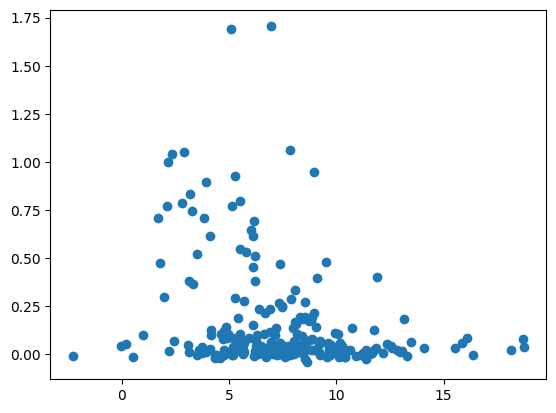

In [17]:
plt.scatter(df_4b["vina"], df_4b["fitness"])

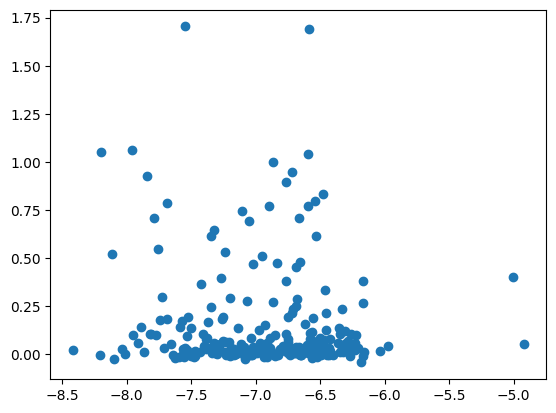

In [18]:
plt.scatter(df_4b["vina_min"], df_4b["fitness"])

In [18]:
import pandas as pd
from glob import glob
from scipy.stats import spearmanr

from REVIVAL.util import get_file_name


# Initialize an empty list to store results
results = []

# Loop through the CSV files and calculate Spearman correlation
for lib in sorted(glob("/disk2/fli/REVIVAL2/zs/vina/chai/struct_joint/score/*-substrate-score_only.csv")):
    lib_name = get_file_name(lib)
    lib_df = pd.read_csv(lib)
    
    df_nan = lib_df[lib_df.isna().any(axis=1)]
    if len(df_nan) > 0:
        print(f"NaN values found in {lib_name}")
        print(df_nan)
    # for each row take min of vina_0, vina_1, vina_2, vina_3, and vina_4
    lib_df["vina_min"] = lib_df[["vina_0", "vina_1", "vina_2", "vina_3", "vina_4"]].min(axis=1)
    lib_df["vina_max"] = lib_df[["vina_0", "vina_1", "vina_2", "vina_3", "vina_4"]].max(axis=1)

    agg_c = ["vina", "vina_min", "vina_max"]
    # std_c = [c for c in chai_df.columns if "std" in c]

    # Calculate Spearman correlation for each column in avg_c
    for c in agg_c:
        valid_df = lib_df[lib_df[c].notna()].copy()
        correlation, p_value = spearmanr(valid_df["fitness"].values, valid_df[c].values)
        # std_col = merged_df[c.replace("avg", "std")].values
        results.append({
            "Library": lib_name,
            "Score_Type": c,
            # "variability": std_col.mean(),
            "Spearman_Correlation": correlation,
            "P_Value": p_value
        })

# Convert results into a DataFrame and display it as a table
results_df = pd.DataFrame(results)
display(results_df)

/disk2/fli/miniconda3/envs/REVIVAL/lib/python3.11/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


,Library,Score_Type,Spearman_Correlation,P_Value
0,PfTrpB-4bromo-substrate-score_only,vina,-0.195830,0.002259
1,PfTrpB-4bromo-substrate-score_only,vina_min,-0.182977,0.004373
2,PfTrpB-4bromo-substrate-score_only,vina_max,-0.200574,0.001752
